### Refs
- [RDKit Documentation](https://www.rdkit.org/docs/GettingStartedInPython.html)
- [PubChem](https://pubchem.ncbi.nlm.nih.gov/) - find SDF files for molecules
- [YouTube Tutorial](https://www.youtube.com/watch?v=NozaWUkJ3YM)

### Workflow Suggestions
> After modifying classes from `src` directory, **Restart NoteBook Kernel** is required 
- Recommended action after changing files in `src`: Restart -> Run All

## Imports

In [1]:
from src.loader import SDFLoader
from src.core.compound import MBCompound
from src.utils.renderer import Renderer
from src.utils.ui import Theme


## RDkit Diamag Calcs


In [2]:
SDF_TEST = [
    {"sdf_file": "2-methylpropan-1-ol.sdf", "expected_diamag": -57.9},
    {"sdf_file": "chlorobenzene.sdf", "expected_diamag": -72.19},
    {"sdf_file": "chalconatronate.sdf", "expected_diamag": -95.58},
    {"sdf_file": "AsIIIAsVAlAl3+.sdf", "expected_diamag": -178.78},
    {"sdf_file": "ArenePbIIPb2+.sdf", "expected_diamag": -206.32},
    {
        "sdf_file": "[K(crown)][Dy(BC4Ph5)2].sdf",
        "expected_diamag": -791.52,  # RDKit is treating all C and N atoms as ring_atoms when molecule has macrocyclic structure.
    },
]

[INF] "2-methylpropan-1-ol.sdf": ✅ Diamag is as expected: -57.9000


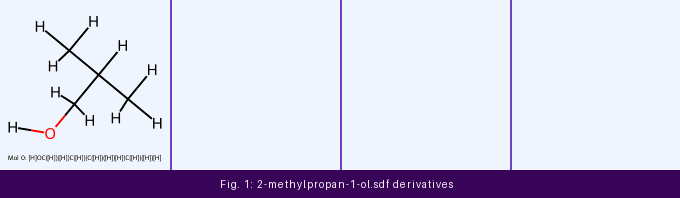

[INF] "chlorobenzene.sdf": ✅ Diamag is as expected: -72.1900


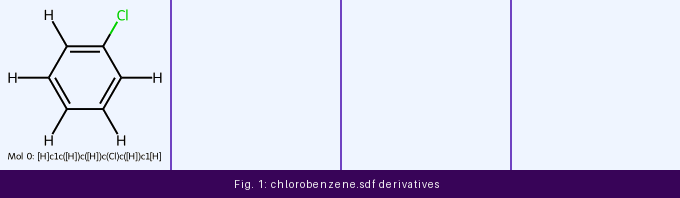

[INF] "chalconatronate.sdf": ✅ Diamag is as expected: -95.5800


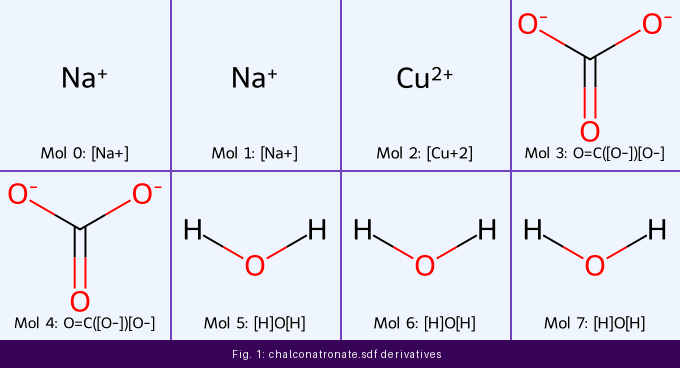

[INF] "AsIIIAsVAlAl3+.sdf": ✅ Diamag is as expected: -178.7800


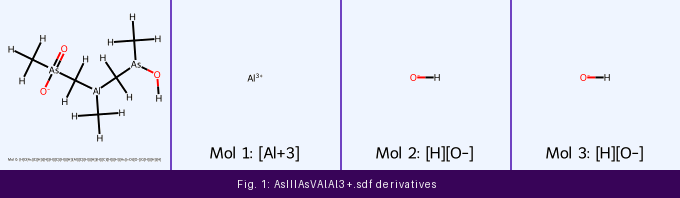

[INF] "ArenePbIIPb2+.sdf": ✅ Diamag is as expected: -206.3200


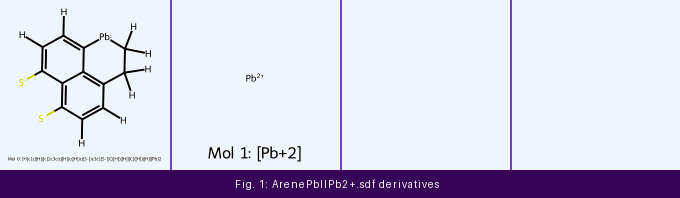

[INF] "[K(crown)][Dy(BC4Ph5)2].sdf": ✅ Diamag is as expected: -791.5200


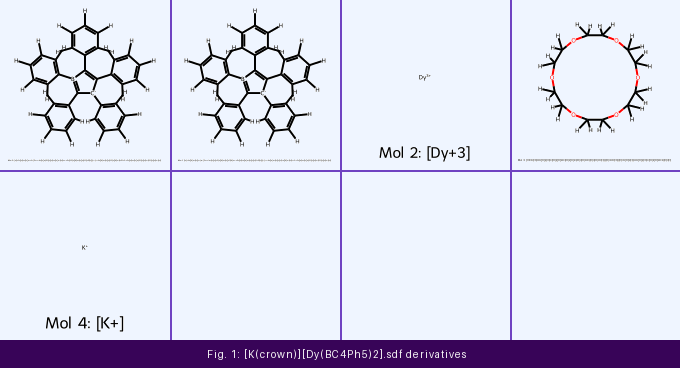

In [3]:
"""Loop through SDF test cases files"""
for test_case in SDF_TEST:
    # Load all MBMolecule instances from the given SDF file
    compound: MBCompound = SDFLoader.Load(test_case["sdf_file"])

    # Calc Diamag Contr of a Compound defined by a single SDF file
    diamag_contr: float = compound.CalcDiamagContr()

    # Test Result
    try:
        assert round(diamag_contr, 2) == test_case["expected_diamag"]
        print(
            f'[INF] "{compound.source_file}": ✅ Diamag is as expected: {diamag_contr:.4f}'
        )
    except Exception as e:
        print(
            f'[ERR] "{compound.source_file}": ❌ result {round(diamag_contr, 2)} is not expected value: {test_case["expected_diamag"]}'
        )

    # Draw Molecules in current SDF File
    display(
        Renderer(Theme.LoFi).GetMoleculesGridImg(
            compound.GetMols(), label=f"Fig. 1: {test_case['sdf_file']} derivatives\n"
        )
    )
